In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
base_final = pd.read_csv("dados/dados_final.csv")

In [63]:
base_final.tail()

,CD_SETOR,preco_m2_itbi,preco_m2_iptu,geometry
17266,355030896000328P,20.222117,1623.000000,"POLYGON ((-46.4264794329999 -23.5284494379999,..."
17267,355030896000330P,883.337500,1378.174312,"POLYGON ((-46.427941 -23.5247509989999, -46.42..."
17268,355030896000332P,441.000000,1368.279070,"POLYGON ((-46.424594 -23.523954999, -46.424754..."
17269,355030896000336P,688.184000,1355.233333,"POLYGON ((-46.4255909999999 -23.532125999, -46..."
17270,355030896000338P,1198.109617,1421.863158,"POLYGON ((-46.414737986 -23.5242255009999, -46..."


In [64]:
print(f"Total de unidades contempladas: {len(base_final)}")

Total de unidades contempladas: 17271


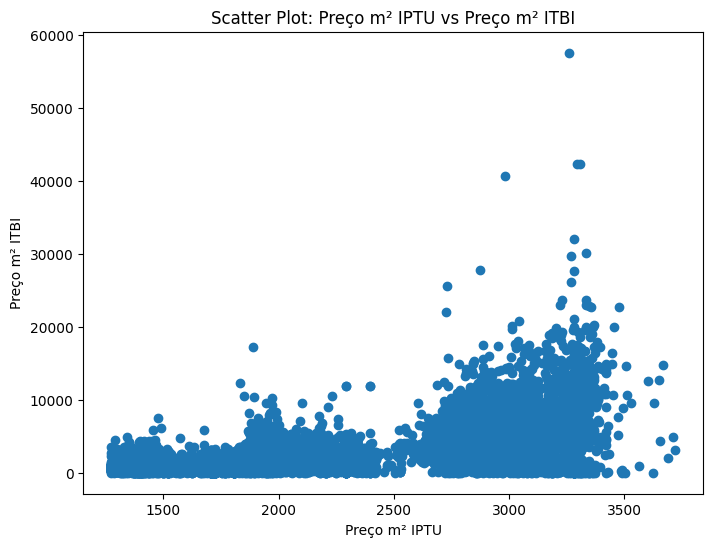

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(base_final["preco_m2_iptu"], base_final["preco_m2_itbi"])
plt.xlabel("Preço m² IPTU")
plt.ylabel("Preço m² ITBI")
plt.title("Scatter Plot: Preço m² IPTU vs Preço m² ITBI")
plt.show()

In [66]:
base_final[["preco_m2_iptu", "preco_m2_itbi"]].corr()

,preco_m2_iptu,preco_m2_itbi
preco_m2_iptu,1.000000,0.639558
preco_m2_itbi,0.639558,1.000000


In [67]:
print(f"Desvio padrão do preço do metro quadrado (estimativa IPTU): R$ {base_final["preco_m2_iptu"].std():.2f}")
print(f"Desvio padrão do preço do metro quadrado (estimativa ITBI): R$ {base_final["preco_m2_itbi"].std():.2f}")

Desvio padrão do preço do metro quadrado (estimativa IPTU): R$ 594.81
Desvio padrão do preço do metro quadrado (estimativa ITBI): R$ 2663.23


In [68]:
print(f"Média do preço do metro quadrado (estimativa IPTU): R$ {base_final["preco_m2_iptu"].mean():.2f}")
print(f"Média do preço do metro quadrado (estimativa ITBI): R$ {base_final["preco_m2_itbi"].mean():.2f}")

Média do preço do metro quadrado (estimativa IPTU): R$ 1975.24
Média do preço do metro quadrado (estimativa ITBI): R$ 2549.77


In [71]:
base_final["UF"] = base_final["CD_SETOR"].str[:2]  
base_final["Município"] = base_final["CD_SETOR"].str[2:7]  
base_final["Distrito"] = base_final["CD_SETOR"].str[7:9]  
base_final["Subdistrito"] = base_final["CD_SETOR"].str[9:11]  
base_final["Setor Censitário"] = base_final["CD_SETOR"].str[11:] 

# Mantém "CD_SETOR" no início e desloca as novas colunas
cols = base_final.columns.tolist()
new_order = cols[:1] + cols[4:] + cols[1:4] 
base_final = base_final[new_order]
base_final

,CD_SETOR,UF,Município,Distrito,Subdistrito,Setor Censitário,preco_m2_itbi,preco_m2_iptu,geometry
0,355030801000001P,35,50308,01,00,0001P,2673.621557,1921.486339,"POLYGON ((-46.5695431899999 -23.5691775939999,..."
1,355030801000002P,35,50308,01,00,0002P,1859.473498,1908.429952,"POLYGON ((-46.5680636229999 -23.565205594, -46..."
2,355030801000003P,35,50308,01,00,0003P,2238.769867,1922.240506,"POLYGON ((-46.5661900549999 -23.566054864, -46..."
3,355030801000004P,35,50308,01,00,0004P,2172.065809,1927.920455,"POLYGON ((-46.568763432 -23.5685602469999, -46..."
4,355030801000005P,35,50308,01,00,0005P,2351.617756,1912.992593,"POLYGON ((-46.5712051149999 -23.570048406, -46..."
...,...,...,...,...,...,...,...,...,...
17266,355030896000328P,35,50308,96,00,0328P,20.222117,1623.000000,"POLYGON ((-46.4264794329999 -23.5284494379999,..."
17267,355030896000330P,35,50308,96,00,0330P,883.337500,1378.174312,"POLYGON ((-46.427941 -23.5247509989999, -46.42..."
17268,355030896000332P,35,50308,96,00,0332P,441.000000,1368.279070,"POLYGON ((-46.424594 -23.523954999, -46.424754..."
17269,355030896000336P,35,50308,96,00,0336P,688.184000,1355.233333,"POLYGON ((-46.4255909999999 -23.532125999, -46..."


In [ ]:
# base_final.to_csv("dados/base_final.csv", encoding="utf-8")